In [1]:
!pip install opencv-python

In [1]:
import cv2

In [4]:
image = cv2.imread(r"C:\Users\RithikRaj\Downloads\nature.jpg")
cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
image = cv2.imread(r"C:\Users\RithikRaj\Downloads\nature.jpg")

start = (10, 10)
end = (1000, 300)
cv2.rectangle(image, start, end, color=(255, 0, 0), thickness=2)
cv2.putText(image, 'Nature', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,125,255), 2, cv2.LINE_AA)
cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
image = cv2.imread(r"C:\Users\RithikRaj\Downloads\nature.jpg")
flipped = cv2.flip(image, 1)
cv2.imshow('Flipped Image', flipped)
cv2.imshow('Image', image)
cv2.imwrite(r"C:\Users\RithikRaj\Downloads\nature1.jpg", flipped)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
image = cv2.imread(r"C:\Users\RithikRaj\Downloads\nature.jpg", 2)
cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
image = cv2.imread(r"C:\Users\RithikRaj\Downloads\nature.jpg")

In [8]:
image

array([[[184, 115,  65],
        [184, 115,  65],
        [183, 114,  64],
        ...,
        [168,  77,  10],
        [166,  75,   8],
        [167,  76,   9]],

       [[184, 115,  65],
        [184, 115,  65],
        [183, 114,  64],
        ...,
        [167,  76,   9],
        [166,  75,   8],
        [168,  77,  10]],

       [[185, 116,  66],
        [184, 115,  65],
        [183, 114,  64],
        ...,
        [172,  81,  14],
        [172,  81,  14],
        [174,  83,  16]],

       ...,

       [[ 80,  38,  19],
        [ 80,  38,  19],
        [ 80,  38,  19],
        ...,
        [ 75,  67,  60],
        [ 78,  70,  63],
        [ 84,  76,  69]],

       [[ 80,  38,  19],
        [ 80,  38,  19],
        [ 80,  39,  17],
        ...,
        [156, 148, 141],
        [159, 151, 144],
        [165, 157, 150]],

       [[ 80,  39,  17],
        [ 80,  39,  17],
        [ 80,  39,  17],
        ...,
        [198, 190, 183],
        [200, 192, 185],
        [203, 195, 188]]

In [9]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray

array([[108, 108, 107, ...,  67,  65,  66],
       [108, 108, 107, ...,  66,  65,  67],
       [109, 108, 107, ...,  71,  71,  73],
       ...,
       [ 37,  37,  37, ...,  66,  69,  75],
       [ 37,  37,  37, ..., 147, 150, 156],
       [ 37,  37,  37, ..., 189, 191, 194]], dtype=uint8)

In [10]:
cv2.imshow('Image', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
h, w = image.shape[:2] #0, 1

In [12]:
h

1124

In [13]:
w

1500

In [30]:
import numpy as np
image = cv2.imread(r"C:\Users\rithi\Downloads\nature.jpg")
kernel = np.ones((3,3), np.int32)

In [18]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int32)

In [49]:
conv = cv2.filter2D(gray, -1, kernel)
cv2.imshow('Image', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
blur = cv2.GaussianBlur(gray, (5, 5), 3)
cv2.imshow('Image', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
kernel_s = np.array([[0, -1, 0], [-1,5,-1], [0,-1,0]])
sharpen = cv2.filter2D(image, -1, kernel_s)
cv2.imshow('Image', sharpen)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
#COLOR (RGB), GRAY(shade of gray, white, black), HSV (Hue, Saturation, Vibrance)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2.imshow('Image', hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

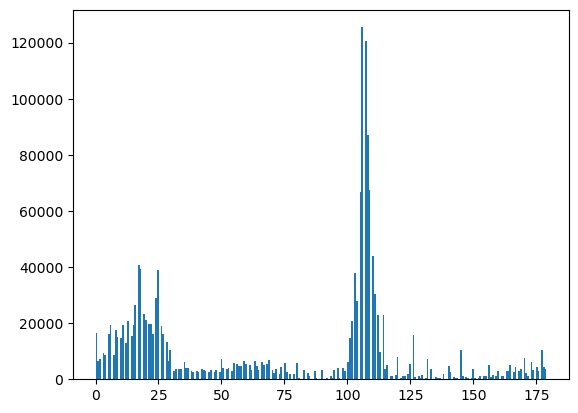

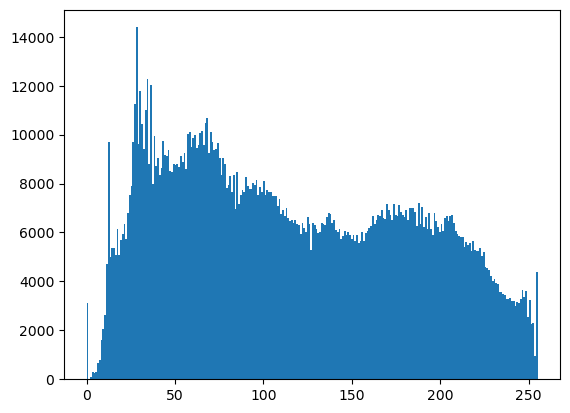

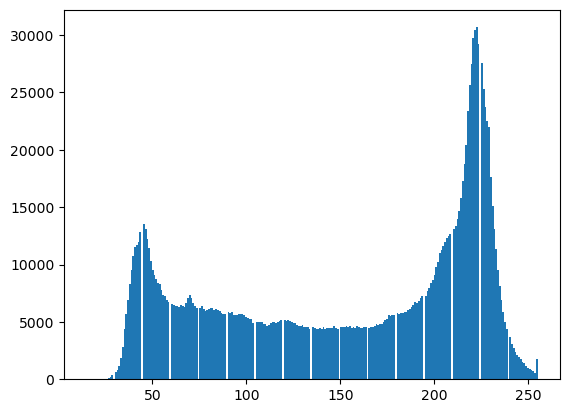

In [39]:
import matplotlib.pyplot as plt

for i, col in enumerate(['H', 'S', 'V']):
    plt.hist(hsv[:, :, i].ravel(), 256)
    plt.show()

In [48]:
_, global_thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('Global', global_thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [47]:
ada_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 11, 2)
cv2.imshow('Adaptive', ada_thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [50]:
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, 3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, 3)

In [53]:
sobel = cv2.magnitude(sobelx, sobely)
sobel = np.uint8(sobel)
cv2.imshow('Sobel', sobel)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [54]:
cam = cv2.VideoCapture(0)

while True:
    ret, frame = cam.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edge = cv2.Canny(gray, 100, 150)
    cv2.imshow('Original', frame)
    cv2.imshow('Edge', edge)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cam.release()
cv2.destroyAllWindows()